In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Q 31. Find the count of White Spanish Male.

In [57]:

workbook_url = 'HospitalDatabase.xlsx'
df= pd.read_excel(workbook_url,sheet_name='Patients')
df
df=((df['Language'] == 'Spanish') & (df['Gender'] == 'Male') & (df['Race'] == 'White')).sum()
print(df)

15


## Q 29. Calculate average LOS.

In [13]:
patient_sum=df['PatientID'].value_counts(ascending=False)
discharge_date=df['DischargeDate'].value_counts(ascending=False)
admission_date=df['AdmissionDate'].value_counts(ascending=False)
df_Difference=(df['DischargeDate'] - df['AdmissionDate']).dt.days
#print(df_Difference.sum())
#print(patient_sum.sum())
print(df_Difference.sum() / patient_sum.sum())

9.534722222222221


## Q 30. Which patient id has most entries in readmission registry.

In [103]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
df['ReadmissionFlag'].idxmax()

1

## Answer: The patient id = 1 has most entries in readmission registry.

## Q.33 Using a bar chart, which Service had the lowest count of Expected Mortality?

<AxesSubplot:xlabel='Service', ylabel='ExpectedMortality'>

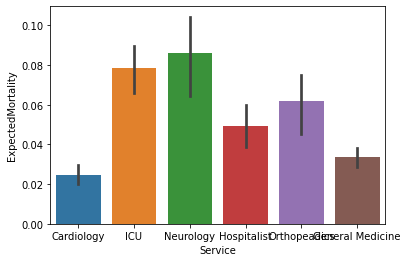

In [82]:
df=pd.read_excel('HospitalDatabase.xlsx', 'Discharges')
df
sns.barplot(data = df,x = 'Service',
            y = 'ExpectedMortality', estimator=np.cov) 

## Answer : Cardiology has the lowest expected mortality.

## Q.34 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [90]:
arr = np.reshape(np.arange(1,31),(6,5))
print('Original arrays:',arr)

Original arrays: [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [91]:
result = arr[[2,2,3,3],[0,1,0,1]]
print('Sliced elements:',result)

Sliced elements: [11 12 16 17]


## Q 35. np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.

In [104]:
arr=np.reshape(np.arange(1,31),(6,5))
print('Original arrays:',arr)

Original arrays: [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [105]:
result=arr[[0,1,2,3],[1,2,3,4]]
print('Sliced elements:',result)

Sliced elements: [ 2  8 14 20]


## Q 36.Create a correlation matrix on EDVisits.

In [192]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df
df.corr().round(3)

,EDVisitID,PatientID,Acuity
EDVisitID,1.000,0.975,0.006
PatientID,0.975,1.000,0.004
Acuity,0.006,0.004,1.000


In [125]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df
df = df.corr()
df.style.background_gradient(cmap='coolwarm')

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


## Q 37. Write a function to print all the upper case letter of a given sentence.

In [115]:
p= 'Hello everyone welcome to Pyathon Hackathon'
p.upper()

'HELLO EVERYONE WELCOME TO PYATHON HACKATHON'

## Q 38.Number of patients on 'Transfer' based on primary diagnosis.

In [152]:
df=pd.read_excel('HospitalDatabase.xlsx', 'ReAdmissionRegistry')
df
df.groupby('PrimaryDiagnosis')['DischargeDisposition'].apply(lambda x: (x=='Transfer').sum()).reset_index(name='count')

,PrimaryDiagnosis,count
0,AMI,0
1,Afib,1
2,Broken Leg,0
3,Diabetes,7
4,Fever,0
5,Flu,2
6,Heart Failure,9
7,Hip Fracture,0
8,Hypertension,0
9,Kidney Failure,0


## Answer: These are the number of patients on 'Transfer' based on primary diagnosis.

## Q 39.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [175]:
p=pd.read_excel('HospitalDatabase.xlsx', 'Patients')
e=pd.read_excel('HospitalDatabase.xlsx', 'EDUnique')
j = p[["PatientID", "FirstName","LastName","DateOfBirth"]].merge(e[["PatientID",  "ReasonForVisit" ]], on = "PatientID", how = "left")
j.to_excel("Results.xlsx", index = False)
j
j[j['ReasonForVisit']=='Migraine']

,PatientID,FirstName,LastName,DateOfBirth,ReasonForVisit
1,2,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,12,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,14,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,22,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...,...
896,897,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,908,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,910,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,915,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


## Q 40.Plot a graph showing the count of patients for the reason visited the hospital.

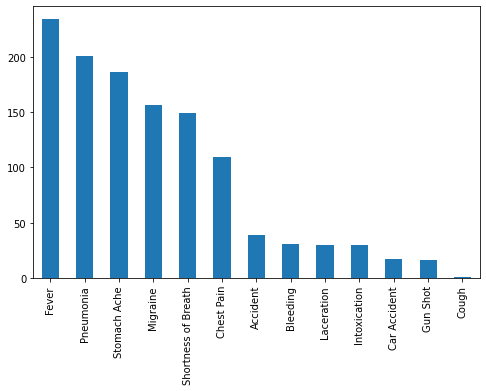

In [199]:
df=pd.read_excel('HospitalDatabase.xlsx', 'EDVisits')
df
plt.figure(figsize=(8,5))
#sns.countplot(data=df,y='ReasonForVisit')
df['ReasonForVisit'].value_counts().plot(kind='bar');

## Q 40.Find the visit type with maximum 'No Show'.